<a href="https://colab.research.google.com/github/LMVieira2/Machine-Learning-Fatec-Matao/blob/main/Aula2702.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Fatec Matão

## Importação de Bibliotecas

* O pandas é uma biblioteca do Python usada para manipulação e análise de dados, oferecendo estruturas como DataFrame e Series para organizar, filtrar, transformar e visualizar dados de forma eficiente. Documentação: https://pandas.pydata.org/docs/
* O NumPy é uma biblioteca do Python para cálculos numéricos, oferecendo arrays multidimensionais eficientes e funções matemáticas otimizadas para operações científicas e estatísticas. Documentação: https://numpy.org/doc/
* O Seaborn é uma biblioteca do Python para visualização de dados, baseada no Matplotlib, que facilita a criação de gráficos estatísticos elegantes e informativos com menos código. Documentação: https://seaborn.pydata.org/
* O matplotlib.pyplot é um módulo do Matplotlib que permite criar gráficos estáticos, interativos e personalizados em Python, sendo amplamente usado para visualização de dados. Documentação: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
* O plotly.express é uma biblioteca do Python para criar gráficos interativos e dinâmicos de forma simples, permitindo visualizações ricas e personalizáveis com poucos comandos. Documentação: https://plotly.com/python-api-reference/plotly.express.html

In [ ]:
!pip install plotly --upgrade
!pip install squarify --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 44.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Carregamento do Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
credit_dataframe = pd.read_csv('/content/drive/MyDrive/am5t2/am5s/credit_data.csv')
credit_dataframe

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


## Análise do Dataset

In [ ]:
credit_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


In [ ]:
credit_dataframe.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [ ]:
credit_dataframe.loc[pd.isnull(credit_dataframe['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
credit_dataframe.loc[credit_dataframe['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
credit_dataframe.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


##Analise de anomalia


In [ ]:
np.unique(credit_dataframe['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

<Axes: xlabel='default', ylabel='count'>

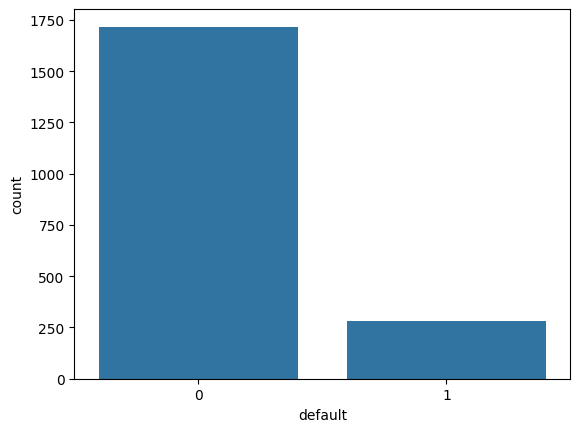

In [ ]:
sns.countplot(x=credit_dataframe['default'])

Possivel anomalia pelo eixo 'x' negativo

(array([202., 207., 196., 209., 173., 210., 202., 217., 196., 188.]),
 array([18.05518851, 22.64684924, 27.23850998, 31.83017071, 36.42183144,
        41.01349218, 45.60515291, 50.19681364, 54.78847438, 59.38013511,
        63.97179584]),
 <BarContainer object of 10 artists>)

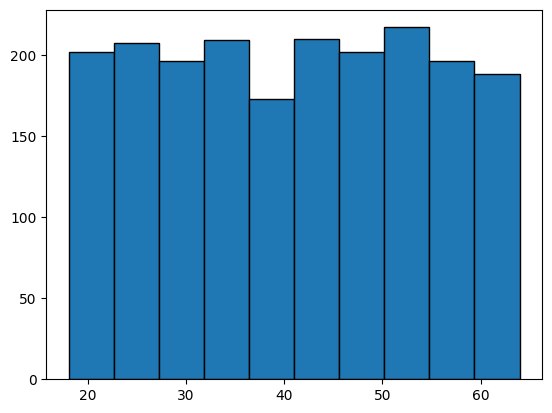

In [ ]:
plt.hist(x=credit_dataframe['age'], edgecolor='black')

(array([189., 198., 199., 179., 204., 209., 206., 199., 219., 198.]),
 array([20014.48947005, 25012.60908088, 30010.7286917 , 35008.84830253,
        40006.96791336, 45005.08752419, 50003.20713501, 55001.32674584,
        59999.44635667, 64997.5659675 , 69995.68557832]),
 <BarContainer object of 10 artists>)

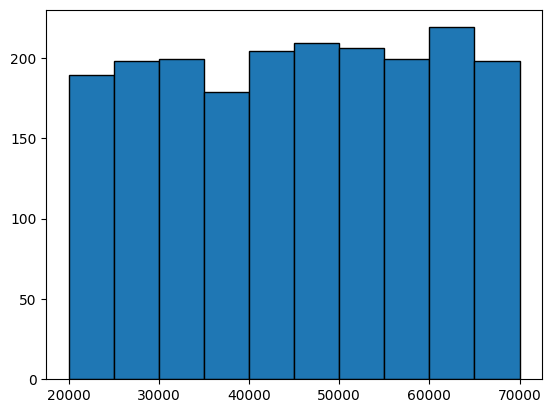

In [ ]:
plt.hist(x=credit_dataframe['income'], edgecolor='black')

(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

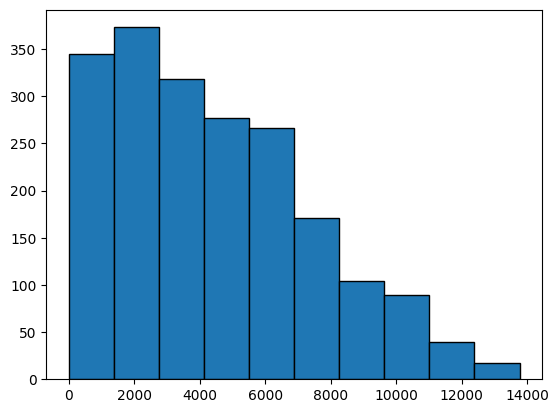

In [ ]:
plt.hist(x=credit_dataframe['loan'], edgecolor='black')

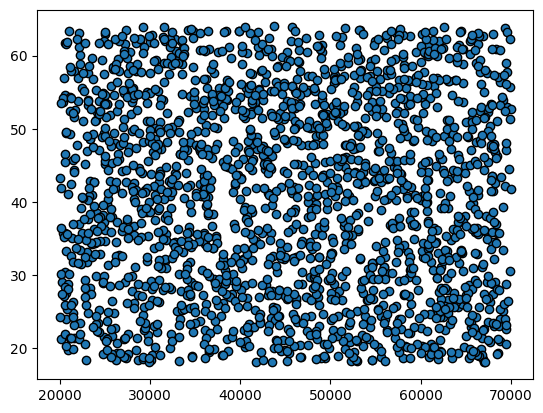

In [ ]:
grafico_cruzado_plt = plt.scatter(x=credit_dataframe['income'], y=credit_dataframe['age'], edgecolor='black')

Observe as anomalias nos graficos de "age", todos tem eixos de quadrante negativo.

In [ ]:
grafico_cruzado = px.scatter_matrix(credit_dataframe, dimensions=['age', 'income', 'loan'], color='default')
grafico_cruzado.show()

## Tratamento de Anomalias


In [ ]:
credit_dataframe.mean()

,0
clientid,1000.500000
income,45331.600018
age,40.807559
loan,4444.369695
default,0.141500


In [ ]:
credit_dataframe['age'].mean()

40.80755937840458

In [ ]:
credit_dataframe.loc[credit_dataframe['age'] < 0, 'age'] = credit_dataframe['age'].mean()

In [ ]:
credit_dataframe.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [ ]:
credit_dataframe.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [ ]:
credit_dataframe.loc[credit_dataframe['age'] < 0]

,clientid,income,age,loan,default


In [ ]:
credit_dataframe.loc[pd.isnull(credit_dataframe['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
credit_dataframe.loc[pd.isnull(credit_dataframe['age']),'age'] = credit_dataframe['age'].mean()

In [ ]:
credit_dataframe.loc[pd.isnull(credit_dataframe['age'])]

,clientid,income,age,loan,default


In [ ]:
credit_dataframe.isnull().sum()

,0
clientid,0
income,0
age,0
loan,0
default,0
